In [121]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings
%matplotlib inline 


In [122]:
pd.set_option("display.max_columns",70000)
pd.set_option("display.max_rows",None)
pd.set_option("display.width",90000)
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")
sample=pd.read_csv("SampleSubmission.csv")

In [123]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [124]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0


In [125]:
sample.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [126]:
train.shape,test.shape,sample.shape 

((1568, 27), (672, 26), (672, 2))

In [127]:
y=train['Response']
del train['Response']

In [128]:
train['sp']="train"
test['sp']="test"
data=pd.concat([train,test]).reset_index(drop=True)


In [129]:
data.shape

(2240, 27)

In [130]:
data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,sp
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,train
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,train
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,train
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,train
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,train


In [131]:
data.tail()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,sp
2235,ID_1D68PV28,1975,Graduation,Married,80934.0,0,1,12-08-2012,70,5,9,6,12,762,83,217,29,80,11,6,0,0,0,0,0,0,test
2236,ID_TM6CYFZO,1955,Graduation,Divorced,84052.8,0,1,18-02-2013,53,4,7,10,5,1078,3,250,153,14,14,5,0,0,0,0,0,0,test
2237,ID_VHR666SC,1952,PhD,Married,63974.4,0,0,09-08-2013,39,1,5,1,5,246,3,12,0,0,25,7,0,0,0,0,0,0,test
2238,ID_O852YAO1,1960,Graduation,Together,69548.4,0,1,19-08-2013,31,7,4,6,8,295,62,177,77,5,29,3,0,0,0,0,0,1,test
2239,ID_ML5HMWHI,1961,Master,Married,56823.6,0,1,13-11-2013,100,3,2,2,6,189,5,19,8,8,4,5,0,0,0,0,0,0,test


/home/xviii_6/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


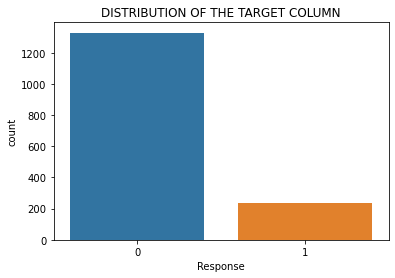

In [132]:
sns.countplot(y)
plt.title("DISTRIBUTION OF THE TARGET COLUMN")
plt.show()

In [133]:
null=data.isnull()
for x in null:
    if x=="True":
        print("There is Null values")
    else:
        print("There is no null values")


There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   object 
 1   Year_of_Birth            2240 non-null   int64  
 2   Education_Level          2240 non-null   object 
 3   Marital_Status           2240 non-null   object 
 4   Disposable_Income        2216 non-null   float64
 5   No_of_Kids_in_home       2240 non-null   int64  
 6   No_of_Teen_in_home       2240 non-null   int64  
 7   Date_Customer            2240 non-null   object 
 8   Recency                  2240 non-null   int64  
 9   Discounted_Purchases     2240 non-null   int64  
 10  WebPurchases             2240 non-null   int64  
 11  CatalogPurchases         2240 non-null   int64  
 12  StorePurchases           2240 non-null   int64  
 13  Amount_on_Wines          2240 non-null   int64  
 14  Amount_on_Fruits        

In [135]:
data.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
sp                          object
dtype: object

In [136]:
data.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          24
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
sp                          0
dtype: int64

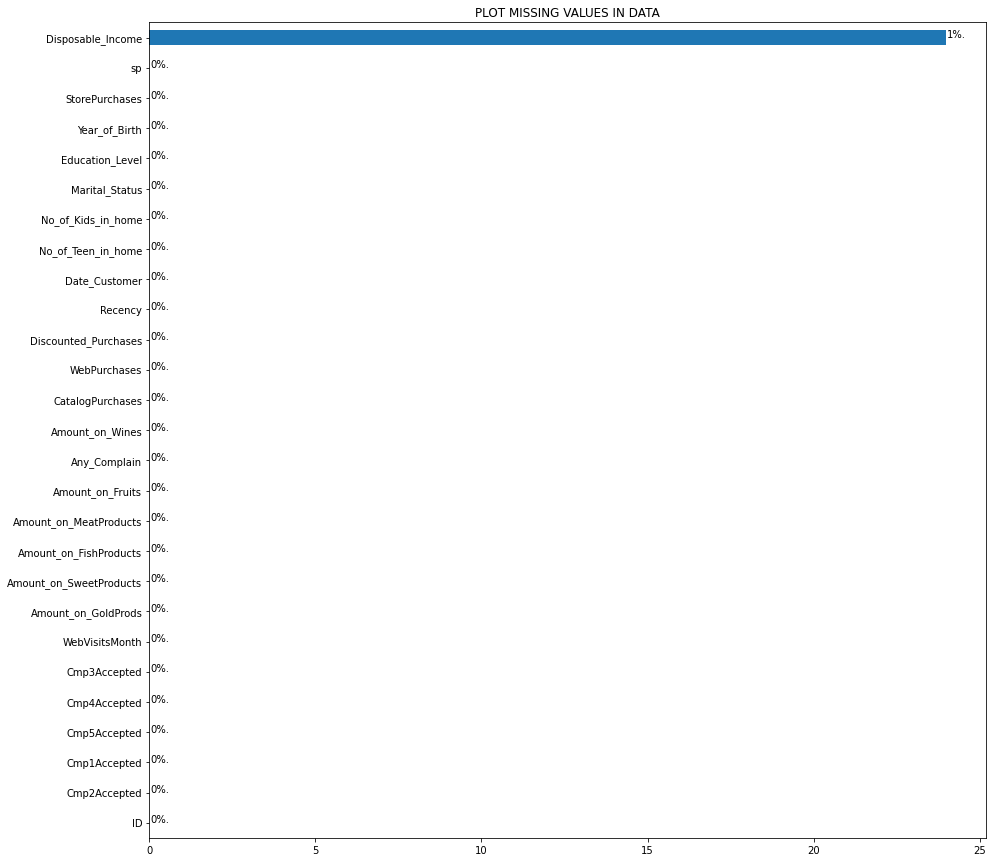

In [137]:
graph=data.isnull().sum().sort_values().plot(kind="barh",figsize=(15,15))
plt.title("PLOT MISSING VALUES IN DATA")
for p in graph.patches:
    z=((p.get_width()/data.shape[0])*100)
    per="{:,.0f}%.".format(z)
    width=p.get_width()
    height=p.get_height()
    x=p.get_x() + width + 0.02 
    y=p.get_y() + height/2 
    plt.annotate(per,(x,y))


/home/xviii_6/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


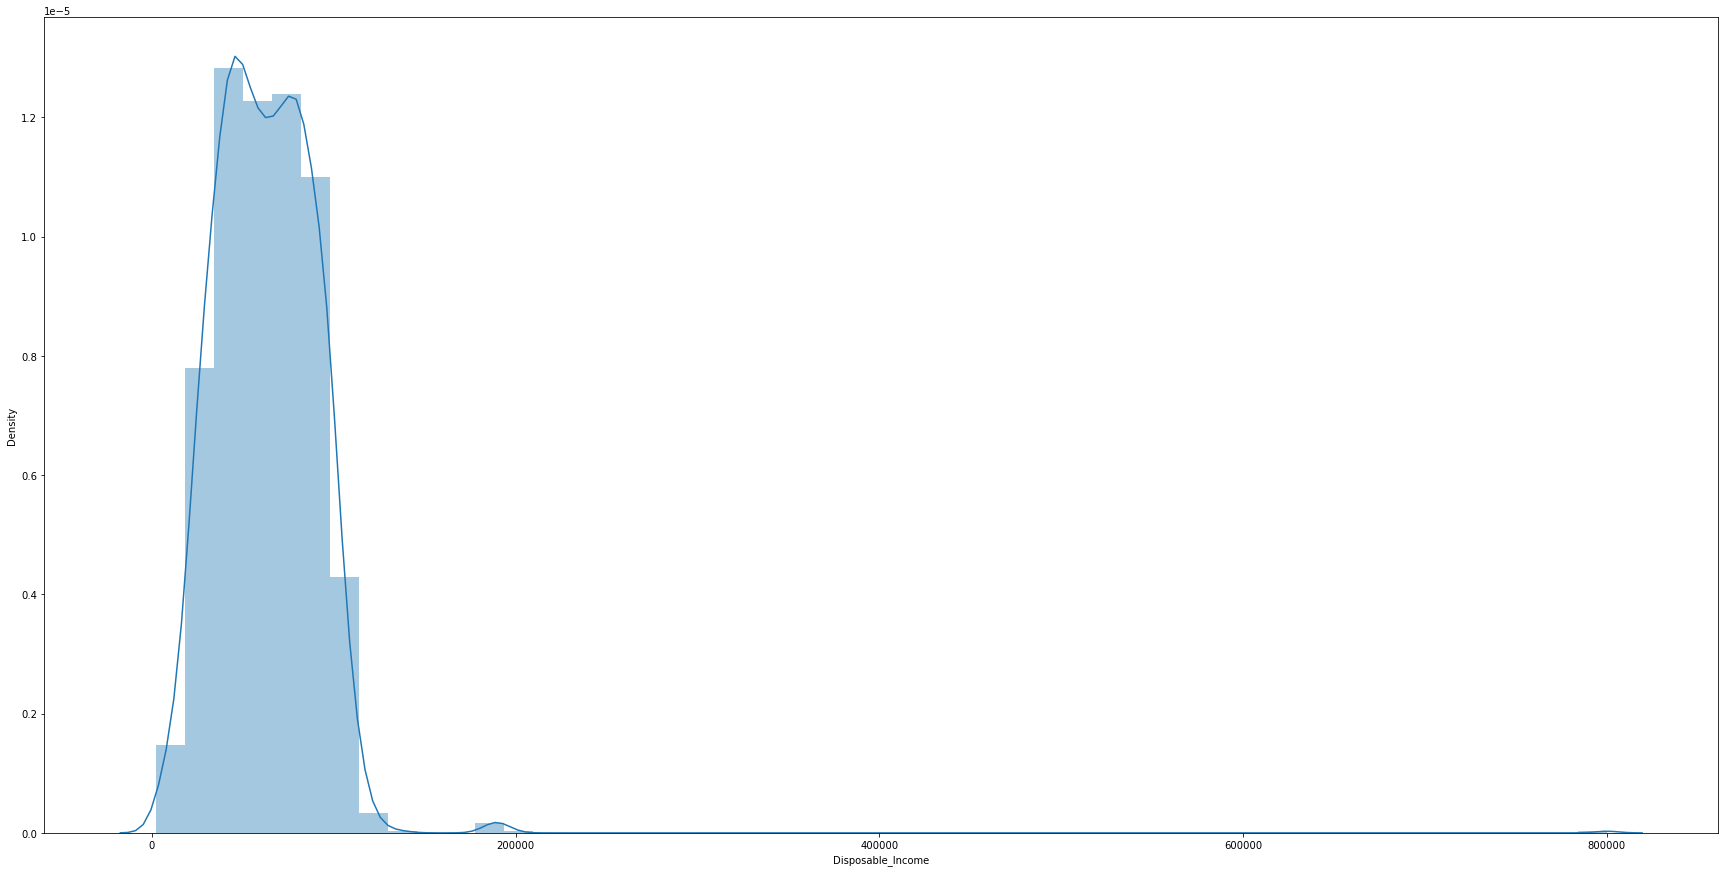

In [138]:
missing_column=data['Disposable_Income']
plt.figure(figsize=(30,15))
sns.distplot(missing_column,kde=True)
plt.show()

/home/xviii_6/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Disposable_Income'>

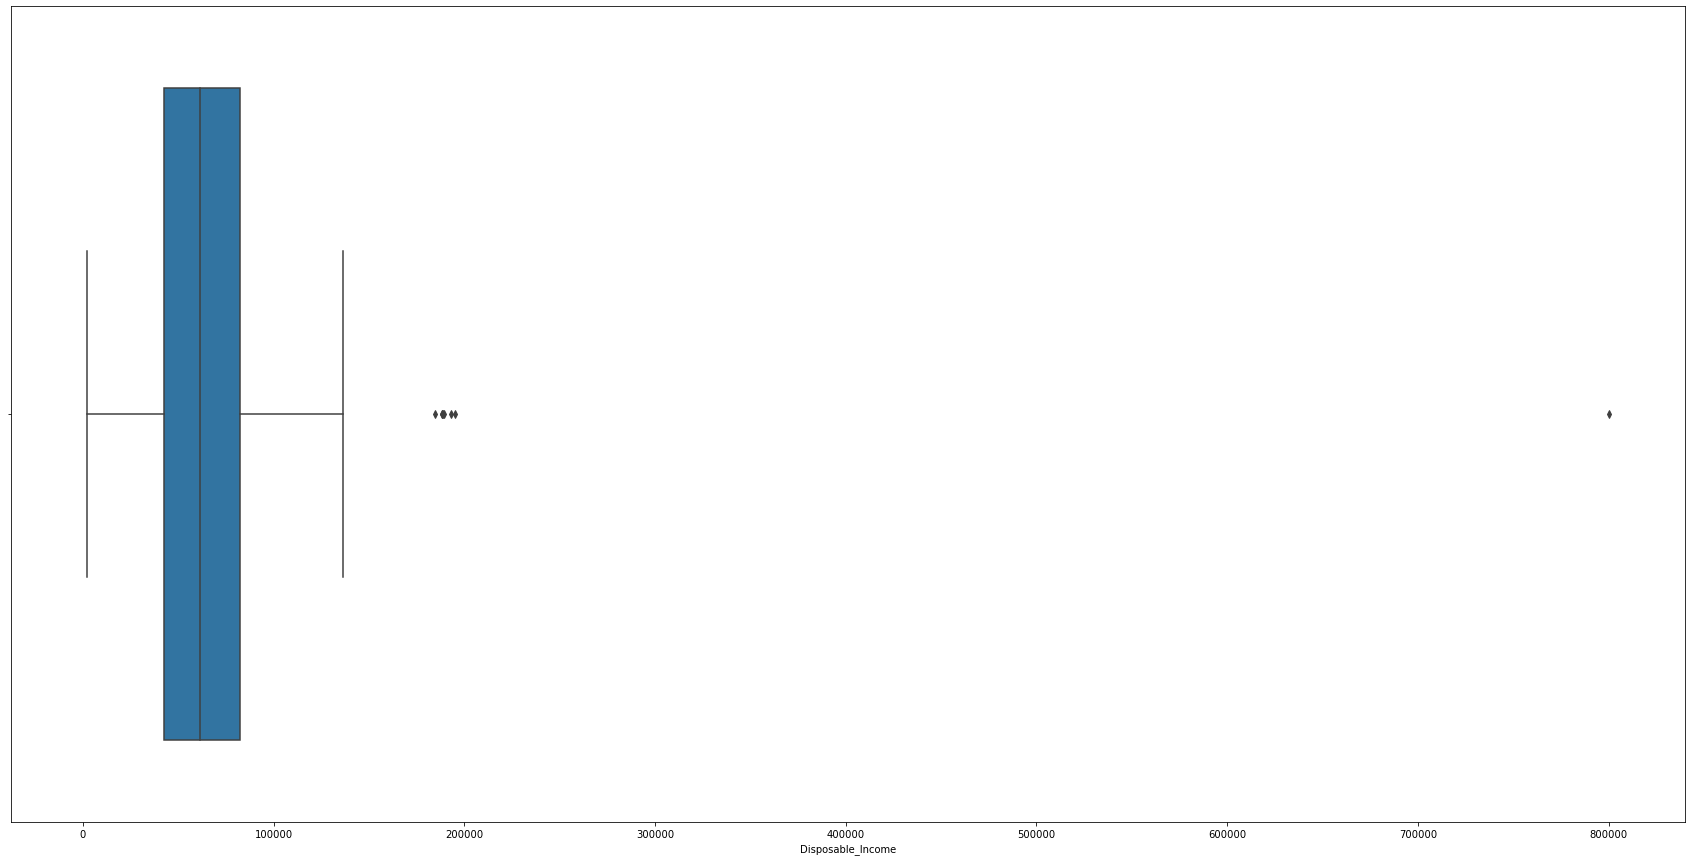

In [139]:
plt.figure(figsize=(30,15))
sns.boxplot(missing_column)

<AxesSubplot:xlabel='Disposable_Income', ylabel='Density'>

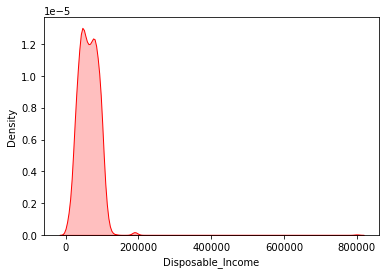

In [140]:
sns.kdeplot(missing_column,shade=True,color="red")

<AxesSubplot:ylabel='Frequency'>

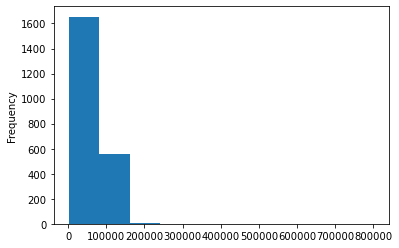

In [141]:
missing_column.plot(kind="hist")

In [142]:
missing_column=missing_column.fillna(missing_column.median())

In [144]:
disponsable_income_clean=missing_column

In [145]:
data['Disposable_Income']=disponsable_income_clean

In [146]:
data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,sp
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,train
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,train
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,train
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,train
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,train


In [147]:
data.shape

(2240, 27)

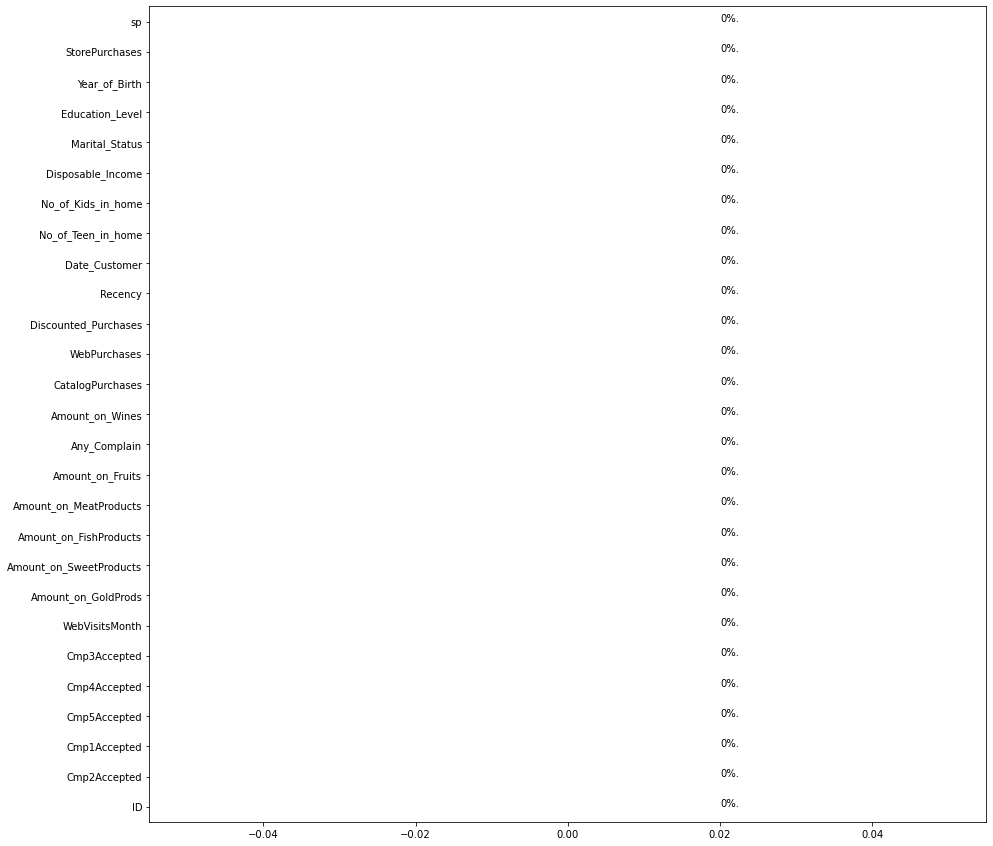

In [149]:
graph=data.isnull().sum().sort_values().plot(kind="barh",figsize=(15,15))
for p in graph.patches:
    z=((p.get_width()/data.shape[0])*100)
    per="{:,.0f}%.".format(z)
    height=p.get_height()
    width=p.get_width()
    x=p.get_x()+ width + 0.02 
    y=p.get_y() + height/2 
    plt.annotate(per,(x,y))


In [150]:
data.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
sp                         0
dtype: int64

In [152]:
data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,sp
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,train
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,train
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,train
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,train
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,train


In [178]:
def creat_plot(data,variable):
    plt.title("OUTLIERS")
    sns.boxplot(data[variable])

/home/xviii_6/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


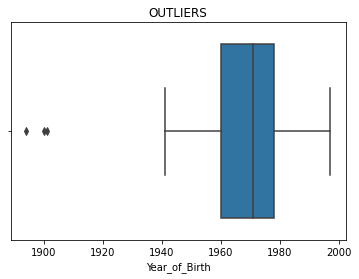

In [181]:
creat_plot(data,"Year_of_Birth")

/home/xviii_6/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


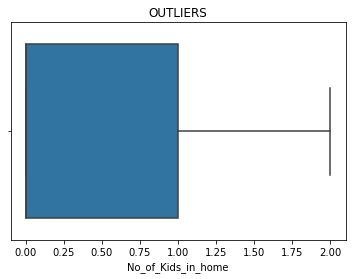

In [182]:
creat_plot(data,"No_of_Kids_in_home")

/home/xviii_6/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


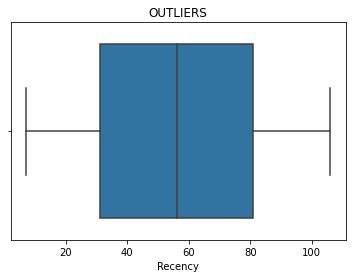

In [183]:
creat_plot(data,"Recency")

/home/xviii_6/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


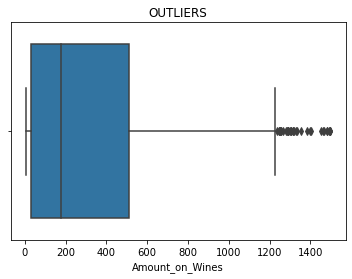

In [184]:
creat_plot(data,"Amount_on_Wines")

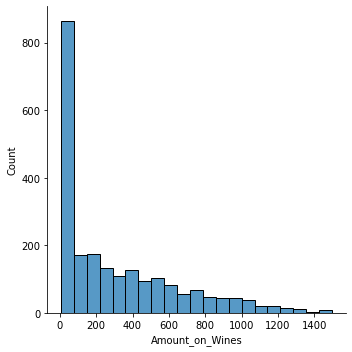

In [185]:
sns.displot(data['Amount_on_Wines'])

<AxesSubplot:>

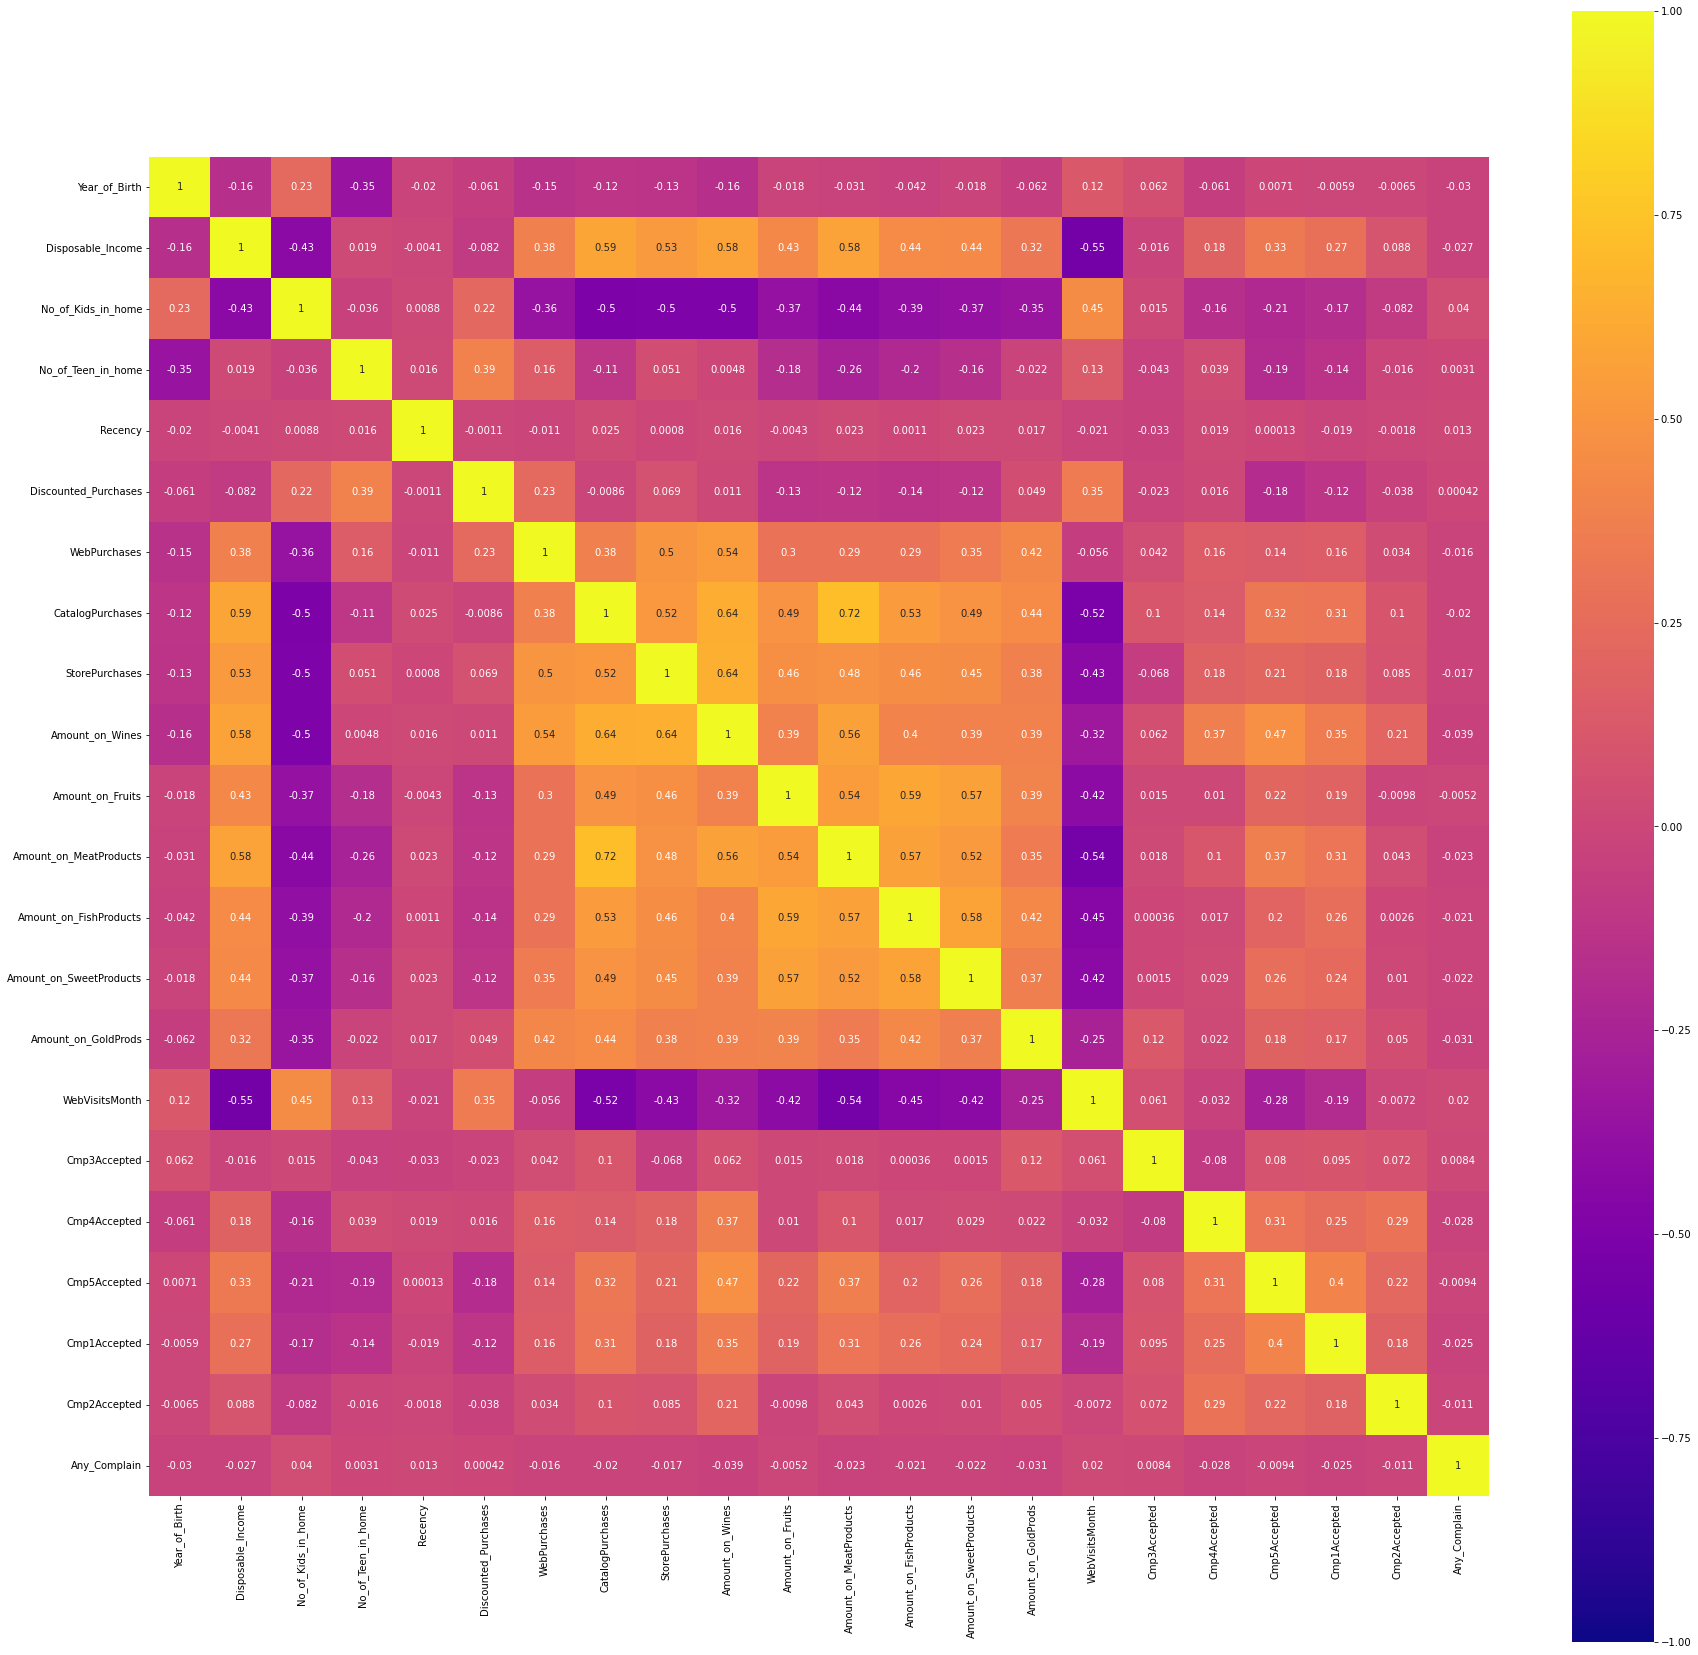

In [190]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap="plasma",vmax=1,vmin=-1,square=True)

In [191]:
data.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1969.805804,62685.570536,0.444196,0.506250,56.109375,2.325000,4.084821,2.662054,5.790179,308.935714,29.302232,166.950000,37.525446,27.062946,44.021875,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375
std,11.984069,30045.547069,0.538398,0.544538,28.962453,1.932238,2.778714,2.923101,3.250958,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391
min,1894.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,42646.500000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,28.750000,4.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,61657.800000,0.000000,0.000000,56.000000,2.000000,4.000000,2.000000,5.000000,178.500000,11.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,81947.700000,1.000000,1.000000,81.000000,3.000000,6.000000,4.000000,8.000000,509.250000,36.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 2160x2160 with 0 Axes>

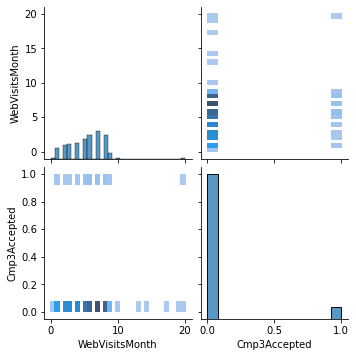

In [197]:
plt.figure(figsize=(30,30))
sns.pairplot(data[['WebVisitsMonth',"Cmp3Accepted"]],kind="hist")

In [ ]:
###Thanks------